In [10]:
import pandas as pd 
import numpy as np 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [11]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cfm = confusion_matrix(y_test, y_pred)
cr = confusion_matrix(y_test, y_pred)

print("Accuracy: ",accuracy)
print("Confusion Matrix: ")
print(cfm)
print("Classification Report: ")
print(cr)

Accuracy:  1.0
Confusion Matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


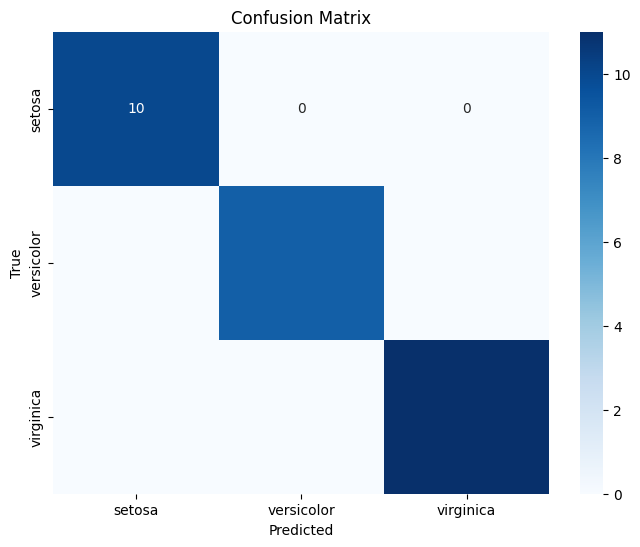

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [16]:
feature_names = iris.feature_names
feature_min = X.min(axis=0)
feature_max = X.max(axis=0)

In [17]:
user_input = []
for i, feature in enumerate(feature_names):
    while True:
        try:
            value = float(input(f"Enter {feature}({feature_min[i]} - {feature_max[i]}): "))
            if feature_min[i] <= value <= feature_max[i]:
                user_input.append(value)
                break
            else:
                print(f"Value out of range. Please enter a value between {feature_min[i]} and{feature_max[i]}.")
        except valueError:
            print("Invalid input. Please enter a numeric value.")

user_input = np.array(user_input).reshape(1, -1)
print(user_input)

[[4.5 4.1 3.2 0.9]]


In [19]:
user_pred = knn.predict(user_input)
pred_class = iris.target_names[user_pred[0]]

print(f"The predicted class for the input feature is: {pred_class}")

The predicted class for the input feature is: versicolor


In [20]:
joblib.dump(knn, "iris_flower_classification.pkl")

['iris_flower_classification.pkl']